In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 🔪 Murder rate by state

In [1]:
file_path = '/./state.csv'

In [3]:
state = pd.read_csv(file_path)

In [4]:
state['Population'].mean() # 평균

6162876.3

In [6]:
from scipy.stats import trim_mean

In [7]:
trim_mean(state['Population'], 0.1) # 절사평균 

4783697.125

In [8]:
state['Population'].median() # 중간값

4436369.5

In [9]:
import numpy as np

In [11]:
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [12]:
import wquantiles

In [13]:
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

In [4]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [5]:
import statsmodels

In [6]:
state['Population'].std() # 표준편차

6848235.347401142

In [7]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25) # 사분위범위  

4847308.0

In [12]:
import statsmodels.api as sm

In [14]:
sm.robust.scale.mad(state['Population'])

3849876.1459979336

In [16]:
# 주별 살인율 백분위수 (살인율: 10만명당 1건 = 1%)
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

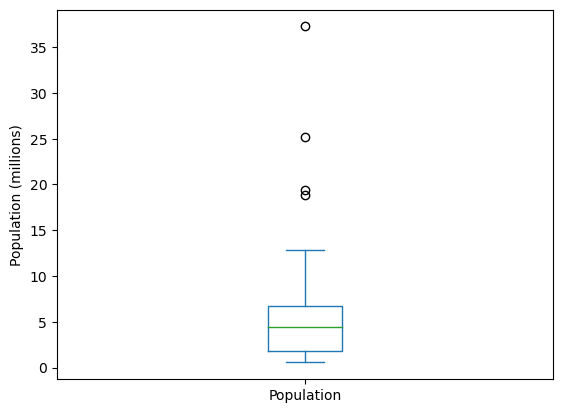

In [17]:
# 상자 그림
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

In [18]:
# 빈도 테이블
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population (millions)')

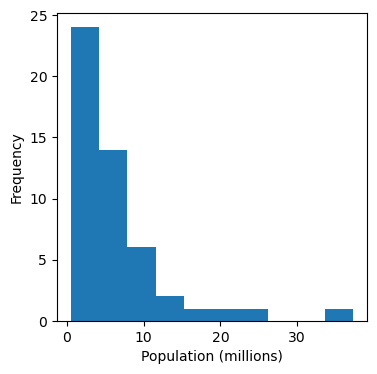

In [19]:
# histogram
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)') # 구간 단위를 줄였기 때문에 설명에 추가해준다 

Text(0.5, 0, 'Murder Rate (per 100,000)')

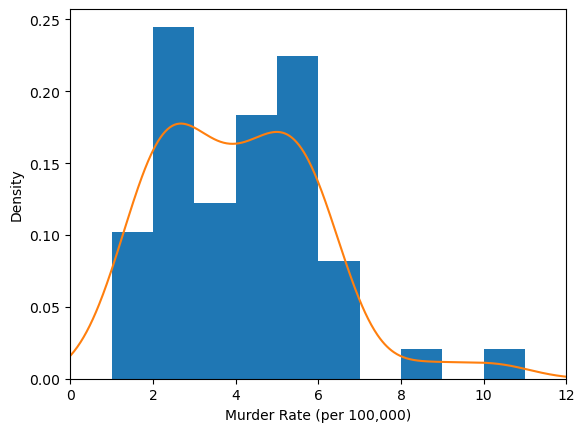

In [20]:
# 밀도 그림
## density=True: 히스토그램을 밀도 형태로 표시하여 총합이 1이 되도록 정규화
## xlim=[0, 12]: x축의 범위를 0에서 12로 제한
## bins=range(1, 12): 1부터 11까지의 구간을 가진 히스토그램의 바(bin) 설정.

ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], bins=range(1, 12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

## 🛫 DFW airline

In [22]:
file_path = '/./dfw_airline.csv'
dfw = pd.read_csv(file_path)
dfw

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


Text(0, 0.5, 'Count')

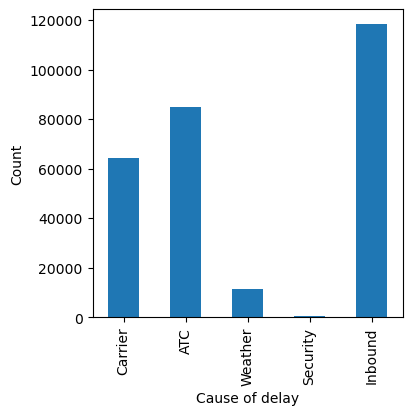

In [23]:
# bar plot
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

## 💹 SP 500

In [34]:
sp500_px = pd.read_csv('/./sp500_data.csv.gz', index_col=0)
sp500_sym =pd.read_csv('/./sp500_sectors.csv')

In [30]:
sp500_px.head() 

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [35]:
sp500_px.head() # index_col=0

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [37]:
sp500_px.index > '2012-07-01'

array([False, False, False, ...,  True,  True,  True])

In [31]:
sp500_sym[sp500_sym['sector'] == 'etf']['symbol']

315    XLI
316    QQQ
317    SPY
318    DIA
319    GLD
320    VXX
321    USO
322    IWM
323    XLE
324    XLY
325    XLU
326    XLB
327    XTL
328    XLV
329    XLP
330    XLF
331    XLK
Name: symbol, dtype: object

In [36]:
# 행 필터링: TRUE/FALSE, 열 필터링: 칼럼 이름 리스트 
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]

In [40]:
etfs.columns

Index(['XLI', 'QQQ', 'SPY', 'DIA', 'GLD', 'VXX', 'USO', 'IWM', 'XLE', 'XLY',
       'XLU', 'XLB', 'XTL', 'XLV', 'XLP', 'XLF', 'XLK'],
      dtype='object')

In [41]:
import seaborn as sns

<AxesSubplot: >

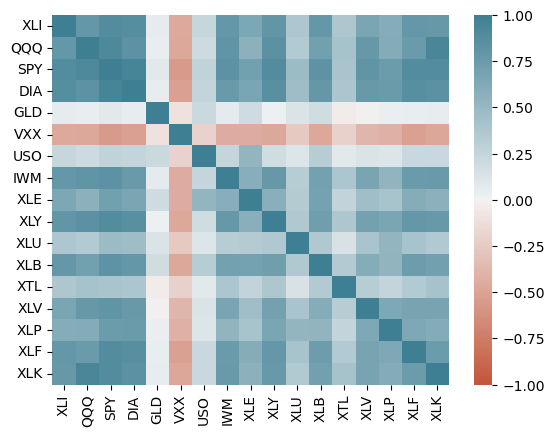

In [42]:
sns.heatmap(etfs.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True)) # 상관관계 플롯 

In [43]:
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]

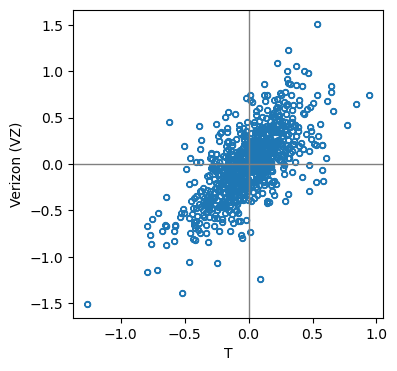

In [44]:
# 산점도
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_label('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

## 🏘️ King County Tax

In [24]:
kc_tax = pd.read_csv('/./kc_tax.csv.gz')
kc_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [25]:
kc_tax0 = kc_tax.loc[(kc_tax['TaxAssessedValue'] < 750000) & (kc_tax['SqFtTotLiving'] > 100) & (kc_tax['SqFtTotLiving'] < 3500), :]

In [26]:
len(kc_tax0)

432693

In [27]:
kc_tax0.shape

(432693, 3)

Text(0, 0.5, 'Tax-Assessed Value')

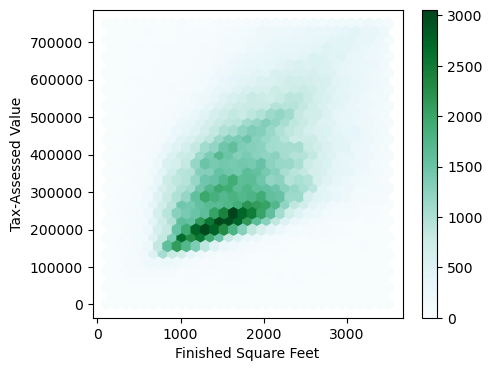

In [52]:
# hexagonal binning
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', gridsize=30, sharex=False, figsize=(5,4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

In [55]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Tax-Assessed Value')

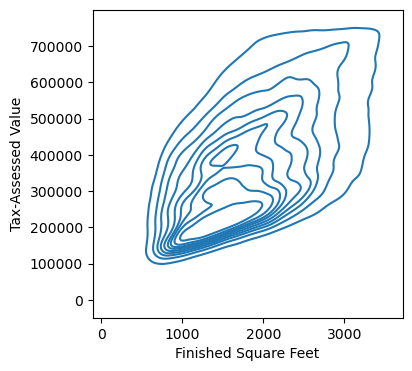

In [54]:
# contour plot 
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.kdeplot(data=kc_tax0, x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

In [28]:
# conditioning -> hex bin
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes), :] 
kc_tax_zip 

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0
...,...,...,...
498049,346000.0,1430,98105.0
498050,463000.0,1610,98105.0
498051,553000.0,1580,98105.0
498052,571000.0,1840,98105.0


###### sns mini exploration

In [32]:
color = 'magenta'
x = sns.light_palette(color, as_cmap=True)
print(x)
x = sns.light_palette(color)
print(x)

[(0.9520626552335513, 0.9400494953206417, 0.9519720393961805), (0.961650124186841, 0.7520395962565134, 0.9615776315169444), (0.9712375931401308, 0.564029697192385, 0.9711832236377083), (0.9808250620934205, 0.3760197981282567, 0.9807888157584722), (0.9904125310467102, 0.18800989906412835, 0.990394407879236), (1.0, 0.0, 1.0)]


###### done

In [33]:
def cond_hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs) # keyword argument

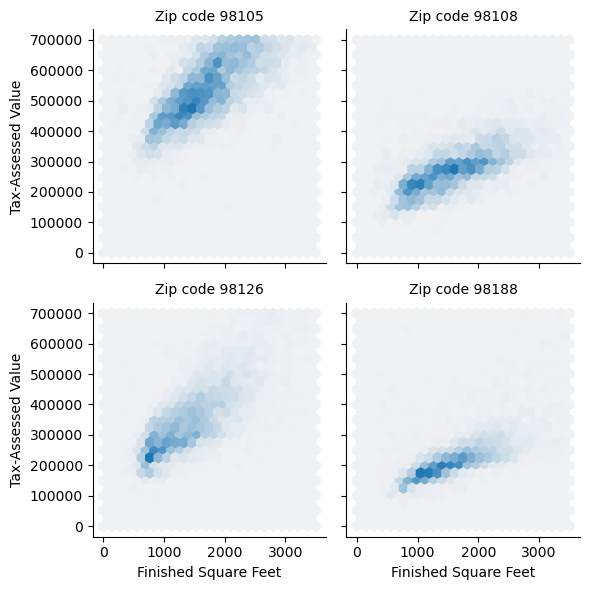

In [35]:
# col_wrap: 한 줄에 표시할 최대 열의 subplot 수를 제한하는 역할 (layout 조정)
g = sns.FacetGrid(kc_tax_zip,col='ZipCode', col_wrap=2)
# g의 모든 subplot에 적용할 함수: cond_hexbin
g.map(cond_hexbin, 'SqFtTotLiving', 'TaxAssessedValue', extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

## 💸 Lending Club Loans

In [3]:
lc_loans =pd.read_csv('/./lc_loans.csv')

In [5]:
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [6]:
# 피벗 테이블
## margins: 피벗 테이블에 총계 행과 열을 추가하여, 각 행과 열의 합계를 보여줍니다 -> All row, column
crosstab = lc_loans.pivot_table(index='grade', columns='status', aggfunc=lambda x:len(x), margins=True)

In [7]:
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [8]:
crosstab2 = lc_loans.pivot_table(index='grade', columns='status', aggfunc=lambda x:len(x), margins=False)
crosstab2

status,Charged Off,Current,Fully Paid,Late
grade,,,,
A,1562,50051,20408,469
B,5302,93852,31160,2056
C,6023,88928,23147,2777
D,5007,53281,13681,2308
E,2842,24639,5949,1374
F,1526,8444,2328,606
G,409,1990,643,199


In [12]:
# All row delete -칼럼 별 비율은 필요 없으니까 
df = crosstab.loc['A':'G', :].copy()
df

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241


In [13]:
# 행 합계(All column)으로 나눈다 - axis=0 주의. 
df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0)
perc_crosstab = df

In [14]:
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,72490
B,0.040054,0.709013,0.235401,0.015532,132370
C,0.049828,0.735702,0.191495,0.022974,120875
D,0.067410,0.717328,0.184189,0.031073,74277
E,0.081657,0.707936,0.170929,0.039478,34804
F,0.118258,0.654371,0.180409,0.046962,12904
G,0.126196,0.614008,0.198396,0.061401,3241


## ✈️ Airline Stats

In [16]:
# 범주형(항공사) vs. 수치형(지연 비율)
# each row: 어떤 항공사 소속 비행기 한 대가 한 달 동안 어떤 항목에서 지연이 어느 정도 비율로 있었는지 
airline_stats =pd.read_csv('/./airline_stats.csv')
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


Text(0.5, 0.98, '')

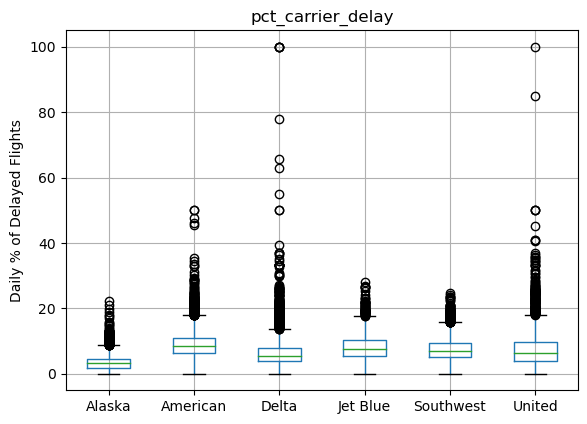

In [20]:
# box plot
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

Text(0, 0.5, 'Daily % of Delayed Flights')

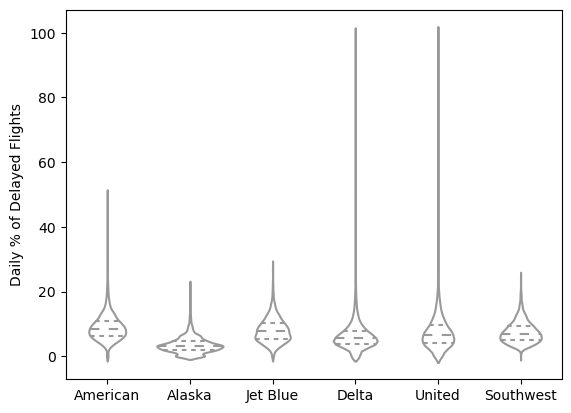

In [23]:
# violin plot ax
ax = sns.violinplot(x='airline', y='pct_carrier_delay', data=airline_stats, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')